In [1]:
import pandas as pd
h_content = pd.read_csv("healthy_article_clearned3_heidi.csv", encoding="utf-8")
# h_keyword = pd.read_csv("healthy_article_1_keyword1.csv", encoding="utf-8")

In [16]:
h_content["KW"] = h_content["KW"].apply(lambda x: x.strip())
h_content["KW"]

0                          腦中風 心臟病 咖啡 蔬果 花青素 大豆異黃酮
1                              血型 基因 抗體 健康飲食 癌症 中風
2                        睡眠不足 阿茲海默症 糖尿病 心血管疾病 睡眠策略
3                              子宮 生薑 薑黃 大蒜 虛寒 手腳冰冷
4                        失智 失智症 預防失智 疲勞 滑手機 Omega3
                           ...                    
2437                                 長壽 規律運動 運動 減重
2438                          中風 女性荷爾蒙 更年期 雌激素 高血壓
2439                              洋蔥 鼻塞 鼻子 生活 生活妙招
2440    乾眼症 消除疲勞 疲勞 眼睛 眼睛疲勞 眼部肌肉 老花眼 蛋白質 護眼 雞蛋 青光眼
2441                       心臟病 健走 久坐 有氧運動 中西醫護心救命帖
Name: KW, Length: 2442, dtype: object

30 1
30 2
30 3
30 4
31 1
31 2
31 3
31 4
32 1
32 2
32 3
32 4
33 1
33 2
33 3
33 4
34 1
34 2
34 3
34 4
35 1
35 2
35 3
35 4
36 1
36 2
36 3
36 4
37 1
37 2
37 3
37 4
38 1
38 2
38 3
38 4
39 1
39 2
39 3
39 4
40 1
40 2
40 3
40 4
41 1
41 2
41 3
41 4
42 1
42 2
42 3
42 4
43 1
43 2
43 3
43 4
44 1
44 2
44 3
44 4
45 1
45 2
45 3
45 4
46 1
46 2
46 3
46 4
47 1
47 2
47 3
47 4
48 1
48 2
48 3
48 4
49 1
49 2
49 3
49 4
50 1
50 2
50 3
50 4
51 1
51 2
51 3
51 4
52 1
52 2
52 3
52 4
53 1
53 2
53 3
53 4
54 1
54 2
54 3
54 4
55 1
55 2
55 3
55 4
56 1
56 2
56 3
56 4
57 1
57 2
57 3
57 4
58 1
58 2
58 3
58 4
59 1
59 2
59 3
59 4
60 1
60 2
60 3
60 4
61 1
61 2
61 3
61 4
62 1
62 2
62 3
62 4
63 1
63 2
63 3
63 4
64 1
64 2
64 3
64 4
65 1
65 2
65 3
65 4
66 1
66 2
66 3
66 4
67 1
67 2
67 3
67 4
68 1
68 2
68 3
68 4
69 1
69 2
69 3
69 4
70 1
70 2
70 3
70 4
71 1
71 2
71 3
71 4
72 1
72 2
72 3
72 4
73 1
73 2
73 3
73 4
74 1
74 2
74 3
74 4
75 1
75 2
75 3
75 4
76 1
76 2
76 3
76 4
77 1
77 2
77 3
77 4
78 1
78 2
78 3
78 4
79 1
79 2
79 3
79 4


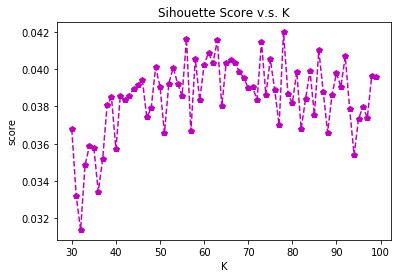

In [25]:
import jieba 
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans
import re


#
tfidf_vectorizer = TfidfVectorizer(lowercase=False)

tfidf_matrix = tfidf_vectorizer.fit_transform(h_content["KW"])


from sklearn.metrics import silhouette_score


ks = []
scores = []
for k in range(30,100):
    clu = KMeans(n_clusters=k, n_jobs=-1)
    print(k,1)
    clu.fit(tfidf_matrix)
    print(k,2)
    ks.append(k)
    print(k,3)
    scores.append(silhouette_score(tfidf_matrix, clu.labels_))
    print(k,4)
print(ks)
print(scores)

import matplotlib.pyplot as plt
%matplotlib inline
plt.title("Sihouette Score v.s. K")
plt.xlabel("K")
plt.ylabel("score")
plt.plot(ks, scores, "p--m")

In [148]:
scores.sort(reverse=True)
scores

[0.04197255204552279,
 0.041626468243313494,
 0.04153641351827736,
 0.041440984779458775,
 0.04100592124888124,
 0.04086921211470614,
 0.04068072001092165,
 0.04055671300260868,
 0.040526356452451985,
 0.040464427211139076,
 0.04032742629187116,
 0.04031844325221132,
 0.04031288501406835,
 0.040233987975464014,
 0.04009537806498419,
 0.040069489415309564,
 0.03990444634121625,
 0.03986624011541585,
 0.03984552937861085,
 0.03977541392856169,
 0.03963849055498575,
 0.039549805539190915,
 0.0395243730144086,
 0.03941013201986906,
 0.0392227521236749,
 0.03921727733021728,
 0.03914163983876677,
 0.039060975544861556,
 0.03905450224741993,
 0.03902524124777675,
 0.03898067135059711,
 0.0389459848052349,
 0.03888570723060245,
 0.038793035230746585,
 0.038672429466647555,
 0.03861642300966775,
 0.038613581053589814,
 0.03857514290070947,
 0.03857257464942463,
 0.03856678871035622,
 0.03848383040507,
 0.038404840976269256,
 0.03836285769327924,
 0.03833333158716897,
 0.038321287164185695,
 0.

In [ ]:
# sklearn.metrics.silhouette_score(X, labels, metric=’euclidean’, sample_size=None, random_state=None, **kwds)

In [158]:
# Kmeans 分群
import jieba 
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans
import re
 
num_clusters = 56
km_cluster = KMeans(n_clusters=num_clusters, max_iter=300, n_init=40, \
                    init='k-means++',n_jobs=-1)
'''
n_clusters: 指定K的值
max_iter: 对于单次初始值计算的最大迭代次数
n_init: 重新选择初始值的次数
init: 制定初始值选择的算法
n_jobs: 进程个数，为-1的时候是指默认跑满CPU
注意，这个对于单个初始值的计算始终只会使用单进程计算，
并行计算只是针对与不同初始值的计算。比如n_init=10，n_jobs=40, 
服务器上面有20个CPU可以开40个进程，最终只会开10个进程
'''
#返回各自文本的所被分配到的类索引
result = km_cluster.fit_predict(tfidf_matrix)
 
print("Predicting result: ", len(result))

Predicting result:  2442


In [159]:
# 分群結果存成dataframe
# y_train = pd.DataFrame(result,columns=["group"])
# y_train
h_content["group"]=result


In [160]:
h_content

,title,URL,Published date,keywords,KW,picture,group
0,三高世代，慢性病是必然？蔬果多酚降風險，看懂哪些食物適合你,https://www.everydayhealth.com.tw//article/22269,2019-08-12,健康飲食 腦中風 心臟病 咖啡 蔬果 花青素 大豆異黃酮,腦中風 心臟病 咖啡 蔬果 花青素 大豆異黃酮,https://live.staticflickr.com/65535/4848697418...,43
1,血型與罹癌風險有關？研究：2種血型容易得胃癌、胰臟癌,https://www.everydayhealth.com.tw//article/22350,2019-08-12,保健新聞 血型 基因 抗體 健康飲食 癌症 中風,血型 基因 抗體 健康飲食 癌症 中風,https://live.staticflickr.com/65535/4848697421...,26
2,睡飽還是累？還清睡眠債的5練習，別讓昨日疲勞積到今天,https://www.everydayhealth.com.tw//article/22361,2019-08-12,養生保健 睡眠不足 阿茲海默症 糖尿病 心血管疾病 睡眠策略,睡眠不足 阿茲海默症 糖尿病 心血管疾病 睡眠策略,https://live.staticflickr.com/65535/4848713400...,17
3,寒氣是子宮的毒素！必吃3蔬菜防宮寒、荷爾蒙失調,https://www.everydayhealth.com.tw//article/14927,2017-05-21,健康飲食 子宮 生薑 薑黃 大蒜 虛寒 手腳冰冷,子宮 生薑 薑黃 大蒜 虛寒 手腳冰冷,https://live.staticflickr.com/65535/4805250717...,5
4,研究：腦過勞釀失智，錢包零錢爆滿竟是失智前兆！,https://www.everydayhealth.com.tw//article/20397,2018-11-06,養生保健 失智 失智症 預防失智 疲勞 滑手機 Omega3,失智 失智症 預防失智 疲勞 滑手機 Omega3,https://c1.staticflickr.com/5/4872/44815812625...,11
5,漏尿，是因為尿急、還是大笑？中醫「對症3招」緩解漏尿困擾,https://www.everydayhealth.com.tw//article/22374,2019-08-10,保健新聞 尿失禁 漏尿 頻尿 中醫,尿失禁 漏尿 頻尿 中醫,https://live.staticflickr.com/65535/4847897248...,36
6,心肌梗塞年輕化，如何避險？最新研究：補這營養大降56％風險,https://www.everydayhealth.com.tw//article/22327,2019-08-09,健康飲食 維生素B6 心肌梗塞 腦梗塞 腦中風 動脈硬化 心血管疾病,維生素B6 心肌梗塞 腦梗塞 腦中風 動脈硬化 心血管疾病,https://live.staticflickr.com/65535/4848679846...,7
7,50％女性有乳房纖維囊腫！多吃4食物平衡荷爾蒙可改善,https://www.everydayhealth.com.tw//article/13028,2016-09-14,健康飲食 女性 南瓜 更年期 大豆 荷爾蒙 乳癌 生理期 胸部,女性 南瓜 更年期 大豆 荷爾蒙 乳癌 生理期 胸部,https://farm9.staticflickr.com/8468/2956656783...,12
8,甲狀腺癌治癒率高！留意「女性癌症」甲狀腺癌7症狀,https://www.everydayhealth.com.tw//article/19778,2019-03-25,保健新聞 甲狀腺癌 甲狀腺 脖子 女性 女性荷爾蒙,甲狀腺癌 甲狀腺 脖子 女性 女性荷爾蒙,https://c1.staticflickr.com/1/937/43012874515_...,12
9,落枕怎麼辦？緩解落枕脖子痛5招自救法,https://www.everydayhealth.com.tw//article/10568,2018-09-25,肩頸痠痛 落枕 壓力 扭傷 疼痛 肌肉 肩頸僵硬 關節,落枕 壓力 扭傷 疼痛 肌肉 肩頸僵硬 關節,https://farm6.staticflickr.com/5764/2230740895...,14


In [152]:
# h_keyword_g.to_csv(r'C:\Users\Big data\Desktop\與個人電腦同步\healthy_article_1_kmeans_keystopword_group.csv')
h_content.to_csv(r'C:\Users\Big data\Desktop\與個人電腦同步\healthy_article_cleared_56clusters_heidi.csv', index=False)


In [162]:
{str(i): len(h_content[h_content["group"]==i]["KW"]) for i in range(56)}

{'0': 38,
 '1': 46,
 '2': 224,
 '3': 54,
 '4': 34,
 '5': 56,
 '6': 81,
 '7': 33,
 '8': 48,
 '9': 28,
 '10': 44,
 '11': 43,
 '12': 51,
 '13': 64,
 '14': 30,
 '15': 43,
 '16': 53,
 '17': 36,
 '18': 17,
 '19': 34,
 '20': 39,
 '21': 34,
 '22': 30,
 '23': 22,
 '24': 42,
 '25': 39,
 '26': 67,
 '27': 44,
 '28': 52,
 '29': 26,
 '30': 68,
 '31': 32,
 '32': 46,
 '33': 32,
 '34': 34,
 '35': 24,
 '36': 20,
 '37': 29,
 '38': 54,
 '39': 31,
 '40': 28,
 '41': 61,
 '42': 37,
 '43': 29,
 '44': 58,
 '45': 23,
 '46': 48,
 '47': 25,
 '48': 49,
 '49': 39,
 '50': 20,
 '51': 48,
 '52': 38,
 '53': 29,
 '54': 30,
 '55': 58}

In [ ]:
# 找出每一群特徵關鍵字
import numpy as np
from jieba import analyse


# 引入TF-IDF關鍵詞抽取接口
def tfidf(text):
    return analyse.extract_tags(text)

def group_keyword_set(group_num):
    keywords = h_content_g["content"][h_content_g["group"] == group_num].apply(tfidf)  # 不用加小括號
    set_n = set()
    for i in keywords:
    #     print(i)
        for j in i:
            set_n.add(j)
    return set_n

# def group_tag_set(df_group_keylist, group_num):

#     group_keywords = [i for i in df_group_keylist["keylist"][df_group_keylist["group"] == group_num]]
#     # 一個 list 元素也是 list
#     group_keywords.remove(nan)
#     set_n = set()
#     for i in group_keywords:
#     # 取出每一個list
#         for j in i:
#         # 取出每個元素放進set，去重
#             set_n.add(j)
#     return set_n

for i in range(8):
    locals()[f"set{i}"] = group_keyword_set(i)

print("------第a組-----")
print(set0)
print("------第b組-----")
print(set1)
print("------第c組-----")
print(set2)
print("------第d組-----")
print(set3)
print("------第e組-----")
print(set4)

In [192]:
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer()

# 訓練: fit + transform  (將詞彙轉成欄位
x_train_vec = vec.fit_transform(h_content["KW"])

# # 測試: 不做fit 只做transform  (測試資料可能有訓練資料裡沒有的欄位，直接丟掉)
# x_test_vec = vec.transform(x_test)

In [95]:
vec.vocabulary_
# 看看詞語對應的欄位數字

dict

In [193]:

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(x_train_vec, h_content["group"])  # 變成vec的 x_train

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
# 暫時沒有test資料
# from sklearn.metrics import accuracy_score

# pre = clf.predict(x_test_vec)  # 變成vec的 x_test
# accuracy_score(pre, y_test)

In [205]:
h_content[h_content.group==2]["KW"][0:60]

20                                    膀胱炎 憋尿 細菌 發炎 補水 疼痛
21                           萵苣 番茄 甜椒 秋葵 苦瓜 食物保存 蔬菜 維生素C
36                           顳顎關節症候群 咀嚼 磨牙 咬合不正 關節 頭痛 下巴
40                                     針眼 熱敷 細菌 皮膚 洗手 眼睛
45                                       脖子 囊腫 淋巴 淋巴結 發炎
75                                瘦身 經期 薑 減重 紅豆 黑木耳 黑木耳露
80                                     胃食道逆流 咖啡 牛奶 果汁 胃酸
92                                茶 登階 運動訓練 長壽飲食 健康飲食 久坐
121                                   牛奶 腸道菌 便祕 大腦 帕金森氏症
131                              五十肩 肩關節 有氧運動 運動 減重 肩頸痠痛
134                             腎臟 慢性腎臟病 三高 糖尿病 均衡飲食 多喝水
138                胃酸過多 胃痛 胃潰瘍 蘋果 蓮藕 高麗菜 山藥 生薑 秋葵 白蘿蔔 番茄
157                              脖子 肩頸僵硬 頸椎病變 伸展操 舒緩痠痛運動
175                                薑黃 肉桂 過敏 抗發炎 亞麻仁 亞麻仁油
182                                      咖啡 拿鐵 牛奶 鈣 維生素D
212                                        優格 脂肪 便祕 身材 鹽
233                            伸展操 塑身操 瑜伽 骨盆 骨盆腔 骨盤體操 體操
253                            

In [ ]:
key=[]
x= h_content.KW.apply(lambda x : (str(x).split(" ")))
for i in x :
    for j in i:
        key.append(j)

all_key=pd.Series(key).value_counts().index



In [206]:
from jieba.analyse import extract_tags
from jieba import cut

p = input("寫下您的困擾")
pcut = list(cut(p))
print(pcut)
test_key=[]
for k in pcut:   
    for i in all_key:
        if k in i:
            test_key.append(i)
print(test_key)
            
pvec = vec.transform(test_key)
print(pvec)
# reverse = {v:k for k, v in trans.items()}
vec.vocabulary_
pre = clf.predict(pvec)[0]
print("推薦您", pre, "的文章!")

寫下您的困擾針眼 疼痛 細菌 火氣大 免疫力 熱敷
['針眼', ' ', '疼痛', ' ', '細菌', ' ', '火氣大', ' ', '免疫力', ' ', '熱敷']
['針眼', '疼痛', '關節疼痛', '鬆筋膜救疼痛', '足健康，90％疼痛不會來！', '細菌', '火氣大', '免疫力', '腸道力就是免疫力', '免疫力是最好的醫生', '熱敷']
  (0, 1213)	1
  (1, 724)	1
  (2, 1226)	1
  (3, 1355)	1
  (4, 2)	1
  (4, 725)	1
  (4, 1152)	1
  (5, 847)	1
  (6, 653)	1
  (7, 109)	1
  (8, 1002)	1
  (9, 110)	1
  (10, 666)	1
推薦您 2 的文章!


In [27]:
# 模型存檔

import pickle
with open('health_all_kmeans_NB24.pickle', 'wb') as handle:
    pickle.dump(clf, handle)

with open('health_all_countvectorizer24.pickle', 'wb') as handle:
    pickle.dump(vec, handle)


In [26]:

# count = 0
# for i in h_keyword_g["keylist"]:
#     if math.isnan(i):
#         count += 1
# print(count)
# for i in range(6800, 6811):
#     print(h_keyword_g["keylist"][i])

for i in range(24):
    print(h_content_g["content"][h_content_g.group == i].count())



397
241
390
37
517
255
150
97
164
202
161
848
253
173
533
61
99
108
265
223
260
118
91
121


In [ ]:
# 結巴提取關鍵字
# import jieba.analyse
# i = 0
# for xt in x_train:
#     print(jieba.analyse.extract_tags(xt, topK=20, withWeight=True, allowPOS=()))
#     i += 1
#     if i > 10:
#         break

In [ ]:

# import json
# import random
# import re

# import jieba
# import numpy as np
# from sklearn.feature_extraction.text import TfidfVectorizer

# jieba.load_userdict("./githubdict.txt")  # 加入自己的辭典